1. Load and visalualize test images
2. Select and visalize various color spaces

# Vehicle detection project

## Step 1: Create data pipeline

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    car_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = car_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = car_img.dtype
    # Return data_dict
    return data_dict

In [81]:
def visualize_images(input_images, num_cols, figure_name, cmap = None):
    "Shows input images by stacking them in num_cols columns"
    fig, axes = plt.subplots((int)((len(input_images) + 1) /num_cols), num_cols, figsize=(24, 20))

    fig = plt.gcf()
    fig.canvas.set_window_title(figure_name)
    
    print(figure_name)
    
    for ax, image in zip(axes.flat, input_images):
        if(cmap == "gray"):
            ax.imshow(image, cmap=cmap)
        elif(image.shape[2]==1):
            ax.imshow(image[:,:,0], cmap = cmap)
        else:
            ax.imshow(image, cmap=cmap)

    plt.show()

In [4]:
import glob

#Read cars and not-cars images

#Data folders
vehicles_dir =     '../data/vehicles/'
non_vehicles_dir = '../data/non-vehicles/'

# images are divided up into vehicles and non-vehicles
cars = []
notcars = []

# Read vehicle images
images = glob.iglob(vehicles_dir + '/**/*.png', recursive=True)

for image in images:
        cars.append(image)
        
# Read non-vehicle images
images = glob.iglob(non_vehicles_dir + '/**/*.png', recursive=True)

for image in images:
        notcars.append(image)
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


Example Car images


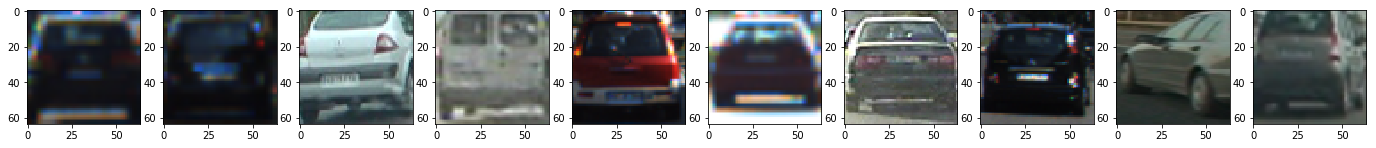

Example not-car images


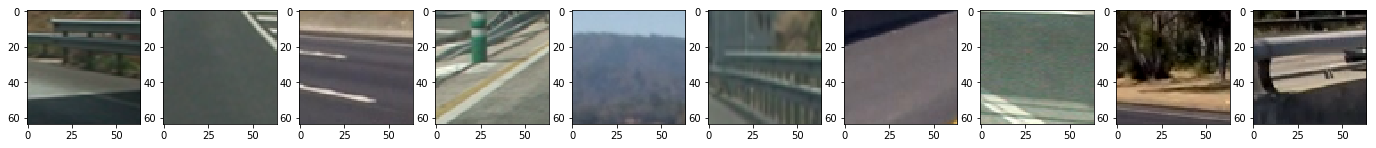

In [5]:
#Visualize some input images
import random

num_images = 10

# Just for fun choose random car / not-car indices and plot example images   
cars_samples = random.sample(list(cars), num_images)
notcar_samples = random.sample(list(notcars), num_images)
    
# Read in car / not-car images
car_images = []
notcar_images = []
for sample in cars_samples:
    car_images.append(mpimg.imread(sample))
    
for sample in notcar_samples:
    notcar_images.append(mpimg.imread(sample))

visualize_images(car_images, num_images, "Example Car images")
visualize_images(notcar_images, num_images, "Example not-car images")
# # Plot the examples
# fig = plt.figure()
# plt.subplot(121)
# plt.imshow(car_image)
# plt.title('Example Car Image')
# plt.subplot(122)
# plt.imshow(notcar_image)
# plt.title('Example Not-car Image')

In [6]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    if conv == 'Gray':
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

In [7]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

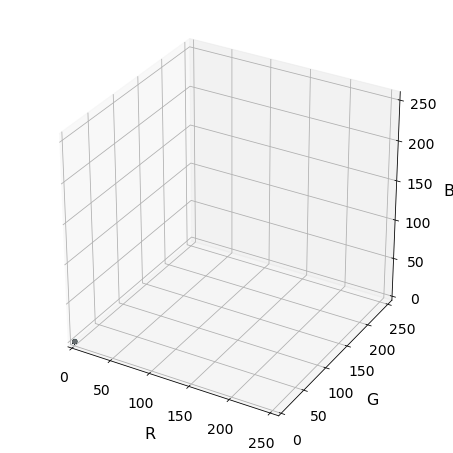

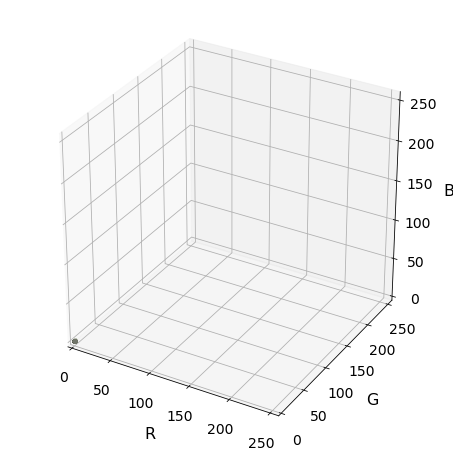

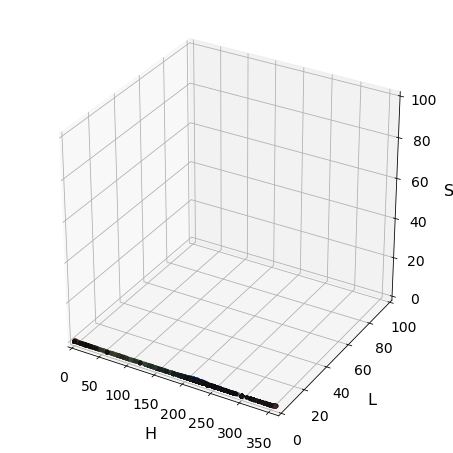

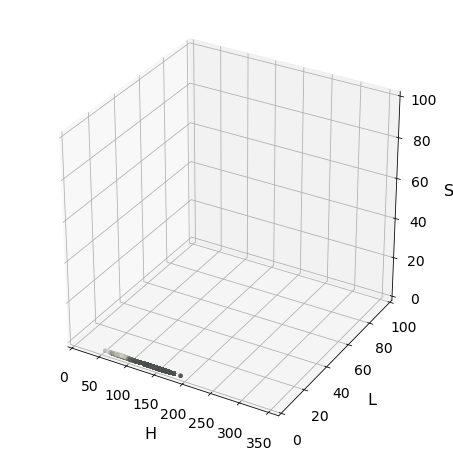

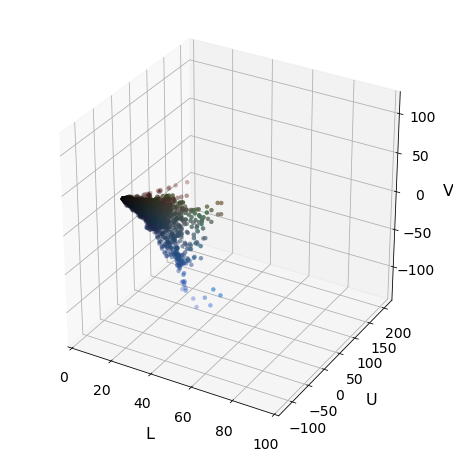

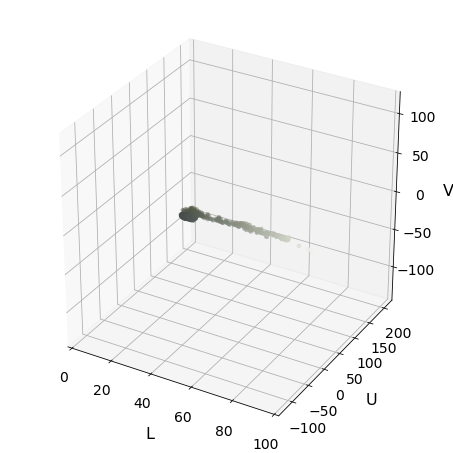

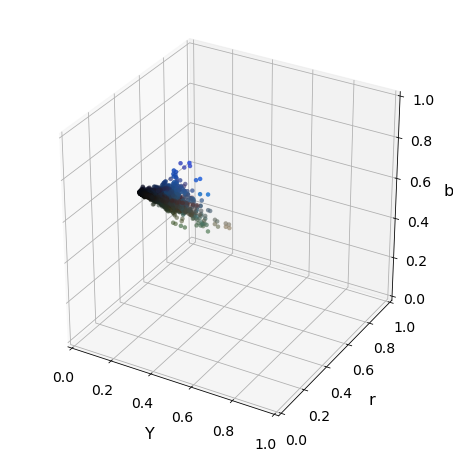

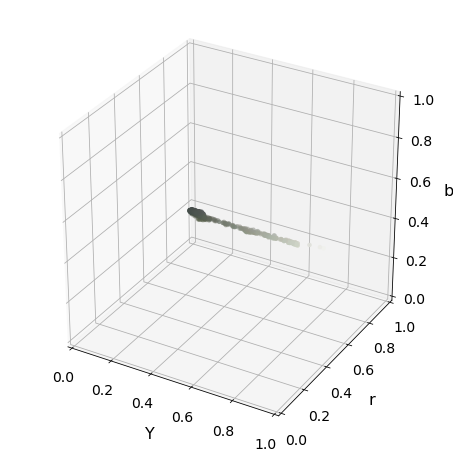

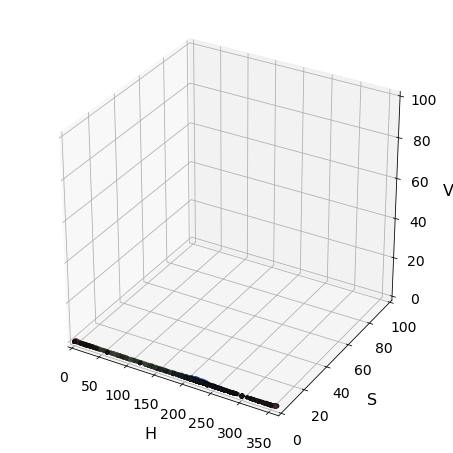

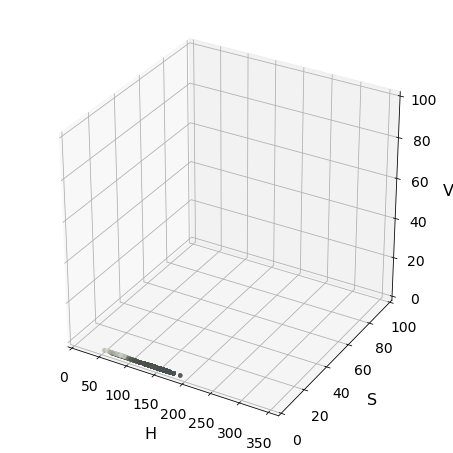

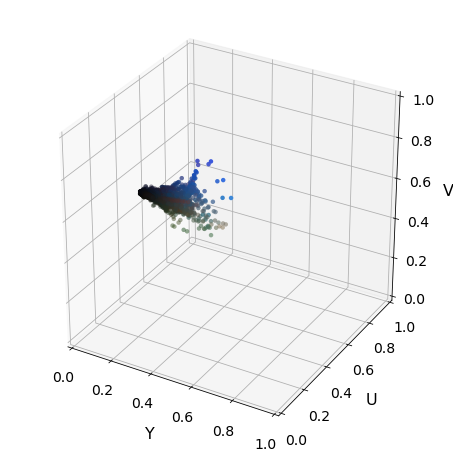

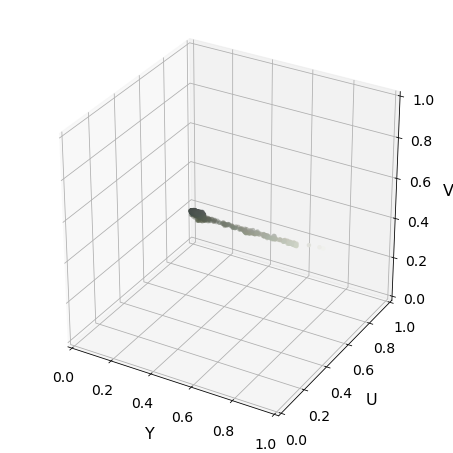

In [8]:
plot3d(car_images[1], car_images[2], axis_labels=list("RGB"))
plot3d(notcar_images[3], notcar_images[3], axis_labels=list("RGB"))

plot3d(convert_color(car_images[1], 'RGB2HLS'), car_images[1], axis_labels=list("HLS"), axis_limits=((0, 360), (0, 100), (0, 100)))
plot3d(convert_color(notcar_images[1], 'RGB2HLS'), notcar_images[1], axis_labels=list("HLS"), axis_limits=((0, 360), (0, 100), (0, 100)))

plot3d(convert_color(car_images[1], 'RGB2LUV'), car_images[1], axis_labels=list("LUV"), axis_limits=((0, 100), (-134,220), (-140,122)))
plot3d(convert_color(notcar_images[1], 'RGB2LUV'), notcar_images[1], axis_labels=list("LUV"), axis_limits=((0, 100), (-134,220), (-140,122)))

plot3d(convert_color(car_images[1], 'RGB2YCrCb'), car_images[1], axis_labels=list("Yrb"), axis_limits=((0, 1), (0, 1), (0, 1)))
plot3d(convert_color(notcar_images[1], 'RGB2YCrCb'), notcar_images[1], axis_labels=list("Yrb"), axis_limits=((0, 1), (0, 1), (0, 1)))

plot3d(convert_color(car_images[1], 'RGB2HSV'), car_images[1], axis_labels=list("HSV"), axis_limits=((0, 360), (0, 100), (0, 100)))
plot3d(convert_color(notcar_images[1], 'RGB2HSV'), notcar_images[1], axis_labels=list("HSV"), axis_limits=((0, 360), (0, 100), (0, 100)))

plot3d(convert_color(car_images[1], 'RGB2YUV'), car_images[1], axis_labels=list("YUV"), axis_limits=((0, 1), (0, 1), (0, 1)))
plot3d(convert_color(notcar_images[1], 'RGB2YUV'), notcar_images[1], axis_labels=list("YUV"), axis_limits=((0, 1), (0, 1), (0, 1)))

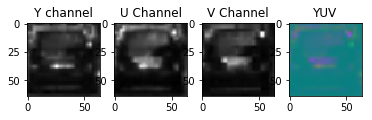

In [9]:
# # Plot the examples
fig = plt.figure()
plt.subplot(141)
plt.imshow(car_images[1][:,:,0], cmap ="gray")
plt.title('Y channel')
plt.subplot(142)
plt.imshow(car_images[1][:,:,1], cmap ="gray")
plt.title('U Channel')
plt.subplot(143)
plt.imshow(car_images[1][:,:,2], cmap ="gray")
plt.title('V Channel')
plt.subplot(144)
plt.imshow(cv2.cvtColor(car_images[1], cv2.COLOR_RGB2YUV))
plt.title('YUV')

In [10]:
# Define a function to return HOG features and visualization
# Define a function to return HOG features and visualization
from skimage.feature import hog

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

In [11]:
def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

In [12]:
# # Define a function to compute color histogram features  
# def color_hist(img, nbins=32, bins_range=[(0, 100), (-134,220), (-140,122)]):
#     # Compute the histogram of the color channels separately
#     #channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range[0])
#     channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range[1])
#     channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range[2])
#     # Concatenate the histograms into a single feature vector
#     #hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
#     hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
#     # Return the individual histograms, bin_centers and feature vector
#     return hist_features


/home/fzff9p/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


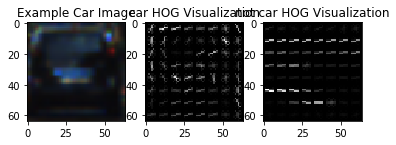

In [13]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

car_features, hog_image = get_hog_features(cv2.cvtColor(car_images[1], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

notcar_features, notcar_hog_image = get_hog_features(cv2.cvtColor(notcar_images[2], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

# Plot the examples
fig = plt.figure()
plt.subplot(131)
plt.imshow(car_images[1])
plt.title('Example Car Image')
plt.subplot(132)
plt.imshow(hog_image, cmap='gray')
plt.title('car HOG Visualization')
plt.subplot(133)
plt.imshow(notcar_hog_image, cmap='gray')
plt.title('not car HOG Visualization')

# if len(car_features) > 0:
#     # Create an array stack of feature vectors
#     X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
#     # Fit a per-column scaler
#     X_scaler = StandardScaler().fit(X)
#     # Apply the scaler to X
#     scaled_X = X_scaler.transform(X)
#     car_ind = np.random.randint(0, len(cars))
#     # Plot an example of raw and scaled features
#     fig = plt.figure(figsize=(12,4))
#     plt.subplot(131)
#     plt.imshow(mpimg.imread(cars[car_ind]))
#     plt.title('Original Image')
#     plt.subplot(132)
#     plt.plot(X[car_ind])
#     plt.title('Raw Features')
#     plt.subplot(133)
#     plt.plot(scaled_X[car_ind])
#     plt.title('Normalized Features')
#     fig.tight_layout()
# else: 
#     print('Your function only returns empty feature vectors...')

In [14]:
# car_color_features = color_hist(car_images[1])
# notcar_color_features = color_hist(notcar_images[1])

# if len(car_features) > 0:
#     # Create an array stack of feature vectors
#     X = np.vstack((car_color_features, notcar_color_features)).astype(np.float64) 
#     print(X.shape)
#     # Fit a per-column scaler
#     X_scaler = StandardScaler().fit(X)
#     # Apply the scaler to X
#     scaled_X = X_scaler.transform(X)
#     # Plot an example of raw and scaled features
#     fig = plt.figure(figsize=(12,4))
#     plt.subplot(131)
#     plt.imshow(car_images[1])
#     plt.title('Original Image')
#     plt.subplot(132)
#     plt.plot(X)
#     plt.title('Raw Features')
#     plt.subplot(133)
#     plt.plot(scaled_X)
#     plt.title('Normalized Features')
#     fig.tight_layout()
# else: 
#     print('Your function only returns empty feature vectors...')

In [15]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [16]:
from sklearn.preprocessing import StandardScaler

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
    

In [17]:
import time
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split

colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size=(32, 32)
hist_bins=32

t=time.time()
car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64) 
print(X.shape)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC X_scaler
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

/home/fzff9p/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/fzff9p/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


32.36 Seconds to extract HOG features...
(17760, 4932)
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 4932
11.97 Seconds to train SVC...


In [18]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Test Accuracy of SVC =  0.9761
My SVC predicts:  [ 0.  1.  1.  1.  0.  1.  0.  1.  1.  0.]
For these 10 labels:  [ 0.  1.  1.  1.  0.  1.  0.  1.  1.  0.]
0.00267 Seconds to predict 10 labels with SVC


In [19]:
import pickle

#Pickle the data as it takes a lot of time to generate it

import os
data_file = '../results/model/svc_pickle.p'

if not os.path.isfile(data_file):
    with open(data_file, 'wb') as pfile:
        pickle.dump(
            {
                'svc': svc,
                'scaler': X_scaler,
                'orient': orient,
                'pix_per_cell': pix_per_cell,
                'cell_per_block': cell_per_block,
                'spatial_size': spatial_size,
                'hist_bins': hist_bins
                
            },
            pfile, pickle.HIGHEST_PROTOCOL)

print('Data saved in pickle file')

Data saved in pickle file


In [20]:
dist_pickle = pickle.load( open("../results/model/svc_pickle.p", "rb" ) )
print(dist_pickle)
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]

{'spatial_size': (32, 32), 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'hist_bins': 32, 'orient': 9, 'pix_per_cell': 8, 'cell_per_block': 2, 'svc': LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)}


/home/fzff9p/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.18.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/fzff9p/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.18.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [21]:

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    rectangles = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
           # hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            hog_features = np.hstack((hog_feat1))
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
 
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            stacked = np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1)
            test_features = X_scaler.transform(stacked)   
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                rectangles.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return rectangles, draw_img

In [22]:
ystart = 400
ystop = 656
scales = [1, 1.5, 2.5]

In [23]:
#Read cars and not-cars images

#Data folders
test_images_dir = '../data/test_images/'

# images are divided up into vehicles and non-vehicles
test_images = []

images = glob.glob(test_images_dir + '*.jpg')

for image in images:
        test_images.append(mpimg.imread(image))

/home/fzff9p/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


result


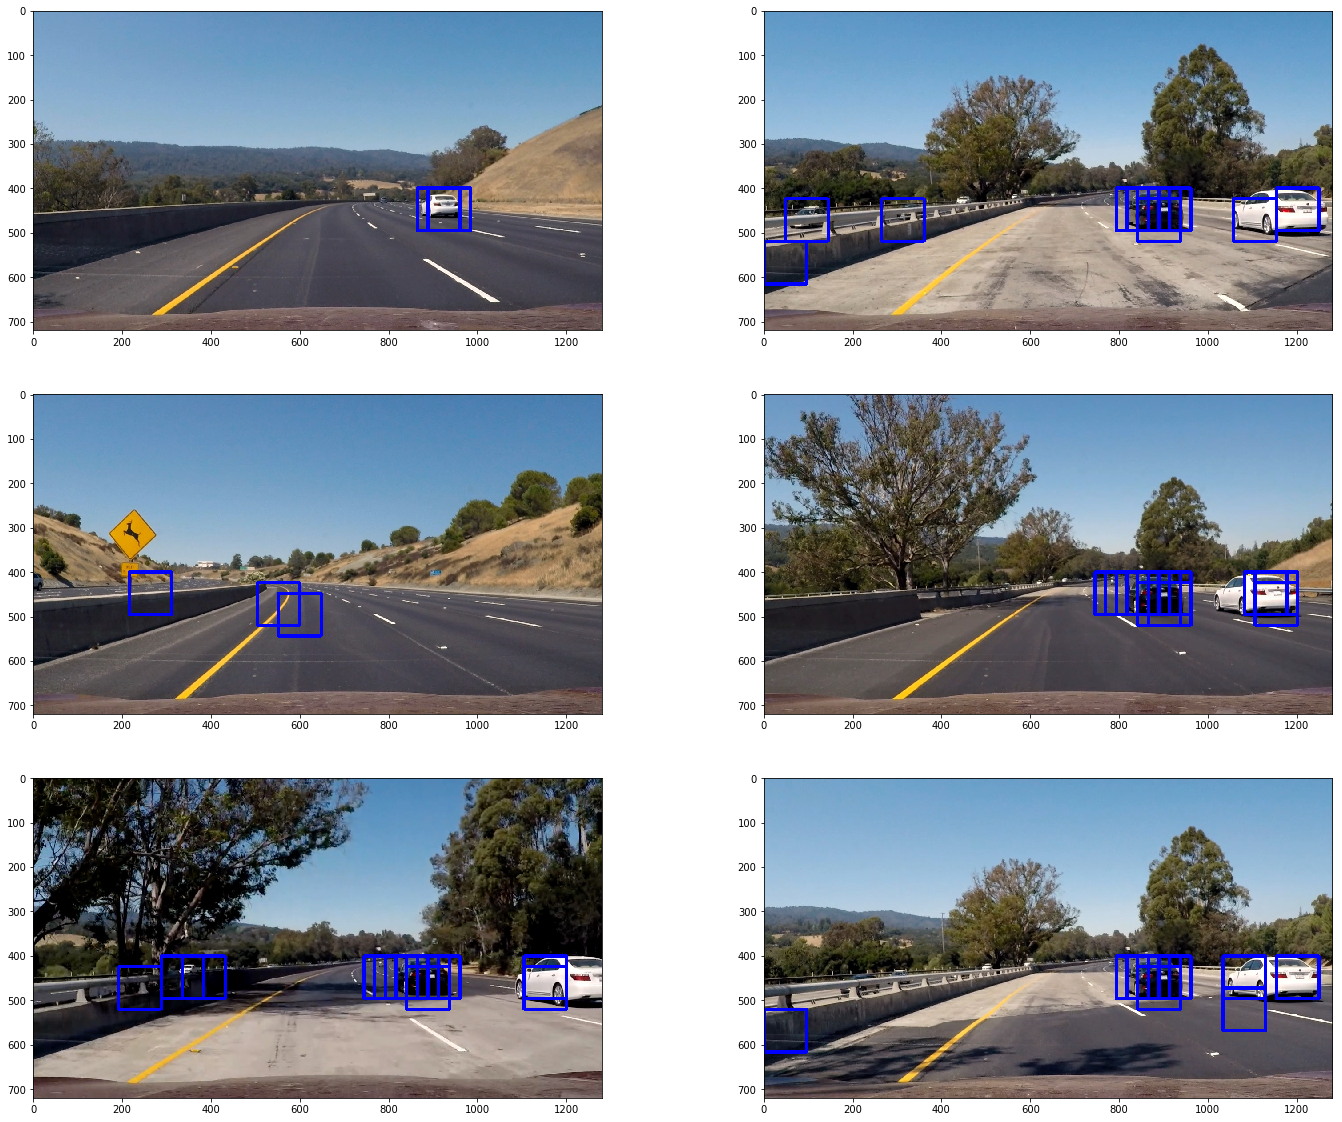

In [24]:
out_imgs =[]
scale = 1.5
out_rectangles = []
for test_image in test_images:
    rectangle, out_img = find_cars(test_image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    out_imgs.append(out_img)
    out_rectangles.append(rectangle)

visualize_images(out_imgs, 2, "result")

In [25]:
print(X.shape)

(17760, 4932)


In [26]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

In [27]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [70]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    img_copy = np.copy(img)
    result_rectangles = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        result_rectangles.append(bbox)
        # Draw the box on the image
        cv2.rectangle(img_copy, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return result_rectangles, img_copy

In [73]:
from scipy.ndimage.measurements import label
result_images = []
result_boxes = []
heatmap_images = []

for test_image, rectangles in zip(test_images, out_rectangles):
    heatmap_image = np.zeros_like(test_image[:, :, 0])
    heatmap_image = add_heat(heatmap_image, rectangles)
    heatmap_images.append(heatmap_image)
    heatmap_image = apply_threshold(heatmap_image, 1)
    labels = label(heatmap_image)
    rectangles, result_image = draw_labeled_bboxes(test_image, labels)
    result_boxes.append(rectangles)
    result_images.append(result_image)
    

test


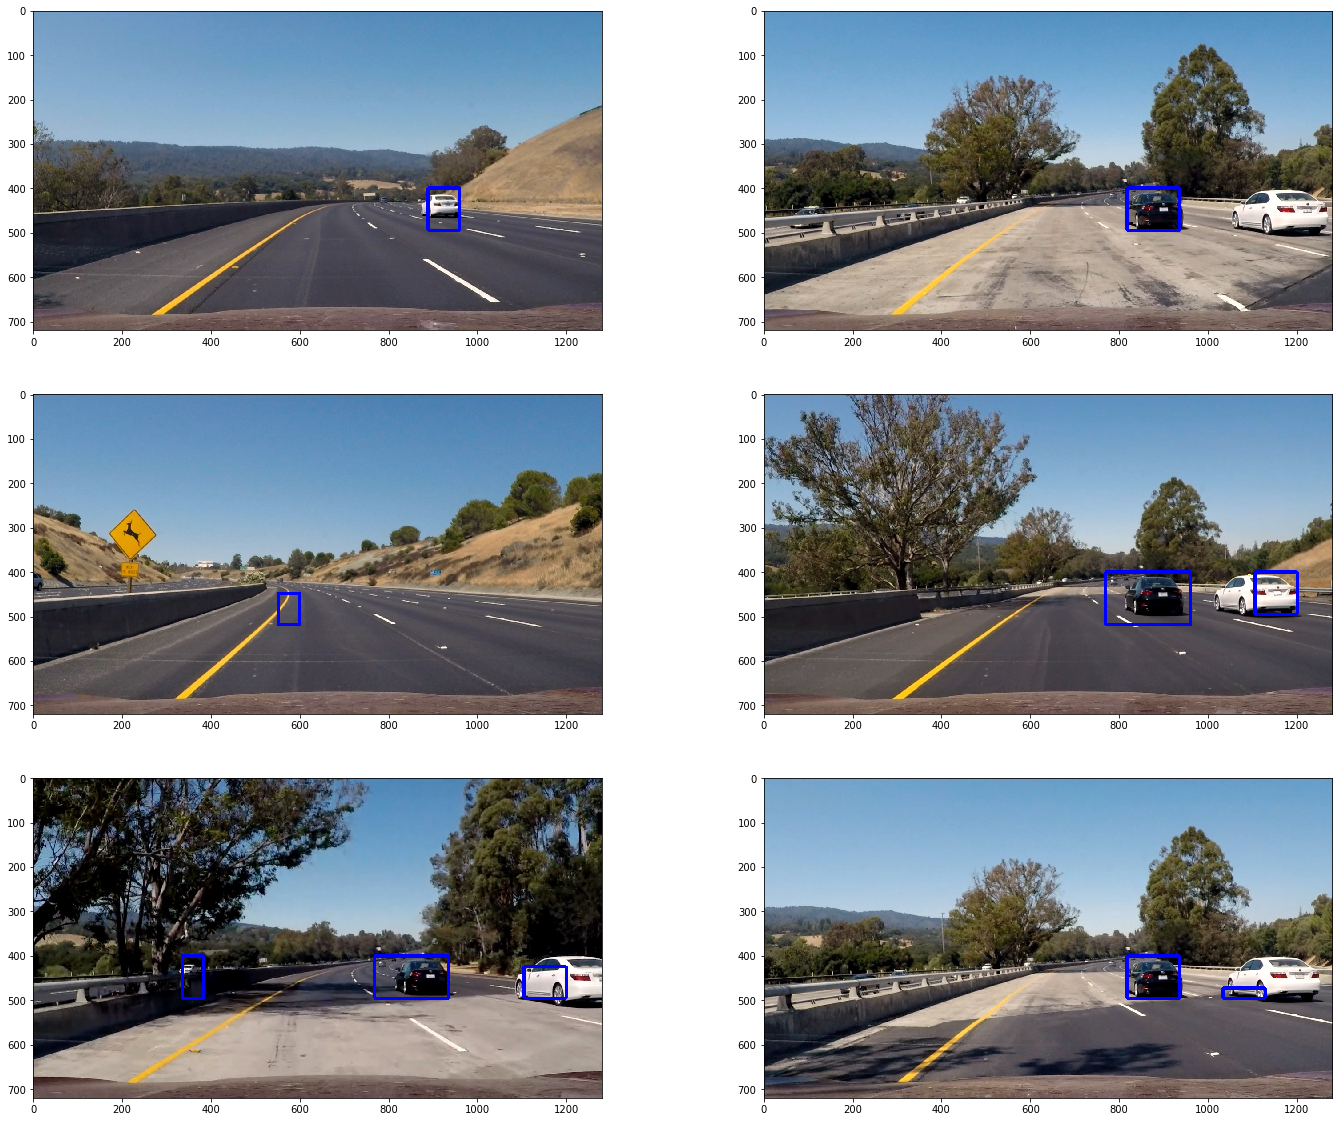

In [72]:
visualize_images(result_images, 2, "test")

Heatmap


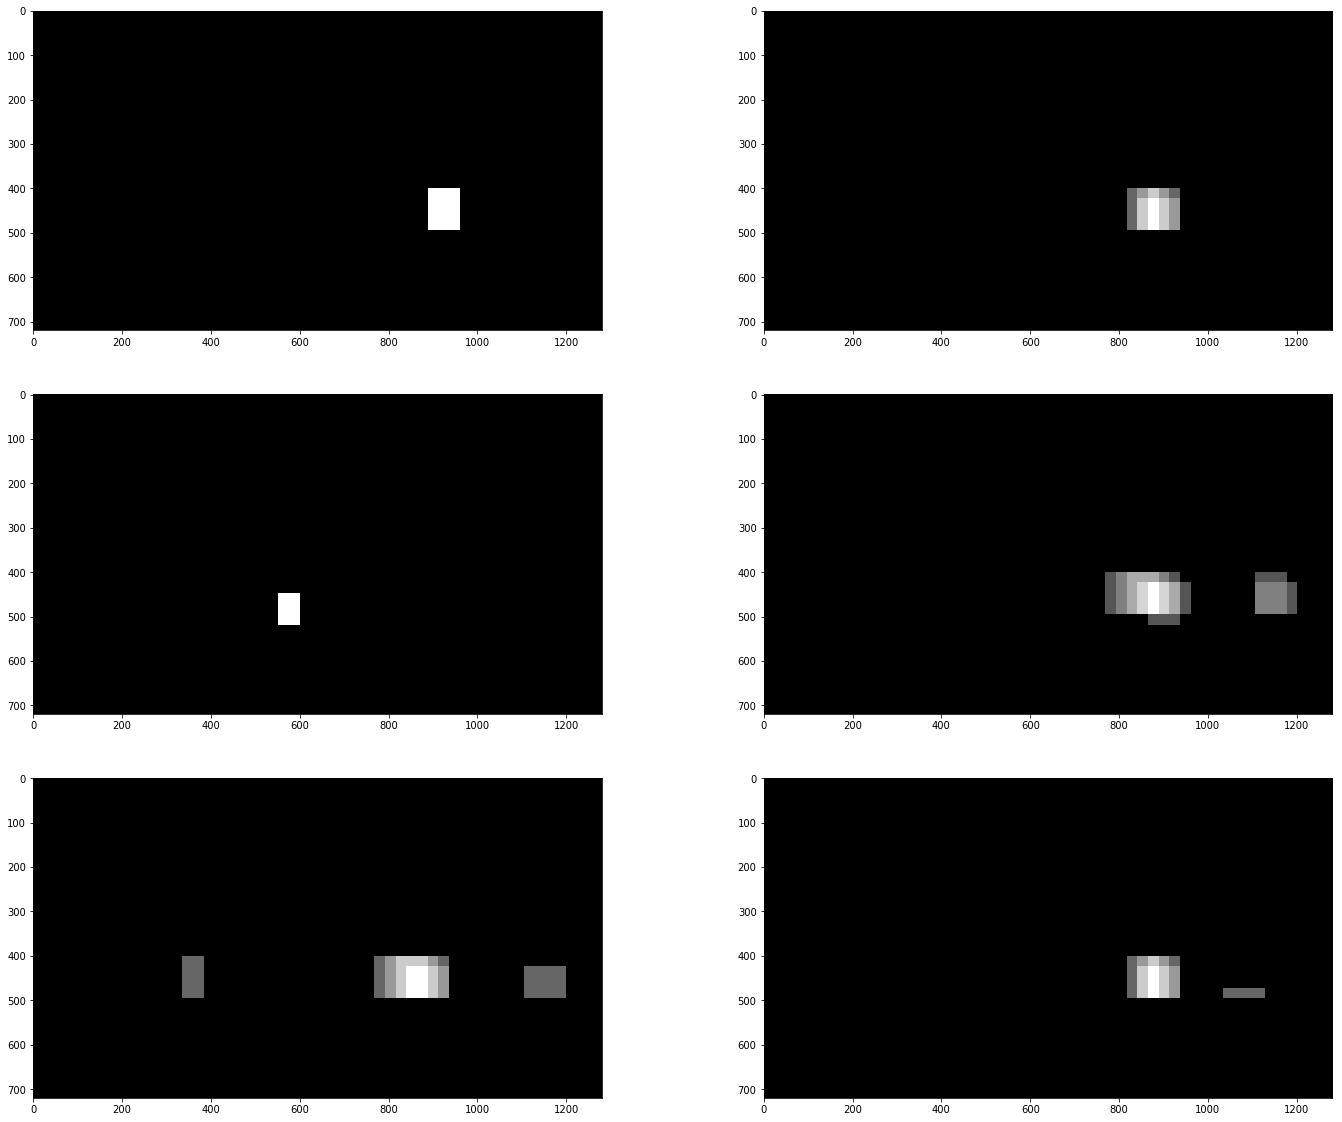

In [82]:
visualize_images(heatmap_images, 2, "Heatmap", cmap="gray")

In [67]:
rectangles

[((816, 400), (935, 495)), ((1032, 472), (1127, 495))]

In [68]:
result_image.shape[2]

3

In [69]:
result_boxes

[[((888, 400), (959, 495))],
 [((816, 400), (935, 495))],
 [((552, 448), (599, 519))],
 [((768, 400), (959, 519)), ((1104, 400), (1199, 495))],
 [((336, 400), (383, 495)),
  ((768, 400), (935, 495)),
  ((1104, 424), (1199, 495))],
 [((816, 400), (935, 495)), ((1032, 472), (1127, 495))]]